# Import All Dependencies 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

# Data Collection

In [2]:
insurance_dataset = pd.read_csv("medical_insurance.csv")

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(2772, 7)

# Infromation About Dataset 

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Splitting the Categorical & Numerical 

In [7]:
categorical_data = insurance_dataset.select_dtypes(include=["object"])
numerical_data = insurance_dataset.select_dtypes(include=["int64", "float64"])

#  Data Analysis 

# Statistical Measure of Dataset

In [8]:
insurance_dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

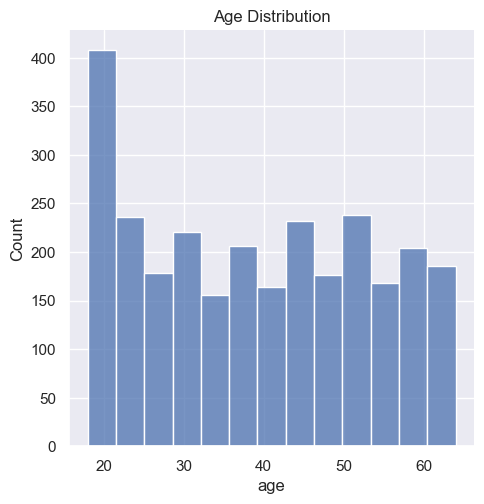

In [9]:
# Distribution of Age Value 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

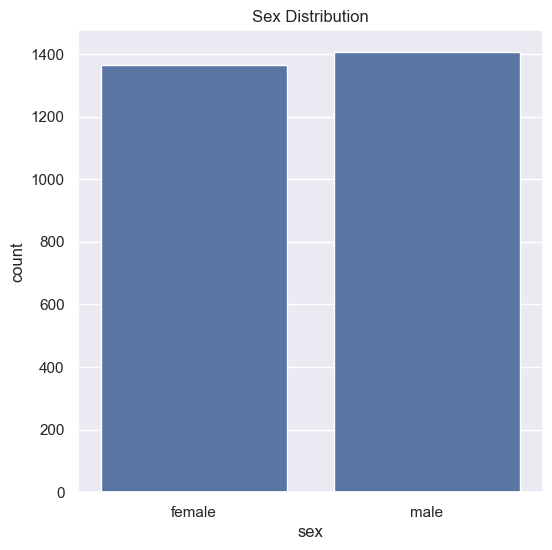

In [10]:
# Gender column 
# how many number of males and females in our dataset 
plt.figure(figsize=(6,6))
sns.countplot(x="sex", data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [11]:
insurance_dataset["sex"].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

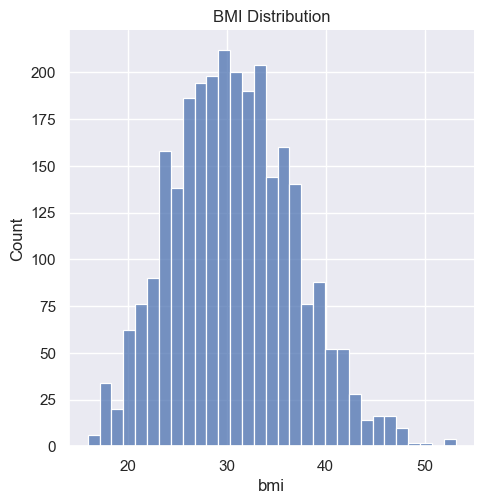

In [12]:

plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["bmi"])
plt.title("BMI Distribution")
plt.show()

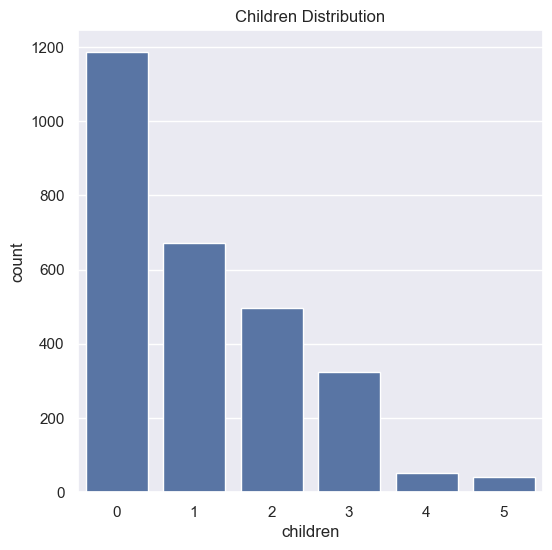

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x="children", data=insurance_dataset)
plt.title("Children Distribution")
plt.show()

In [14]:
insurance_dataset["children"].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

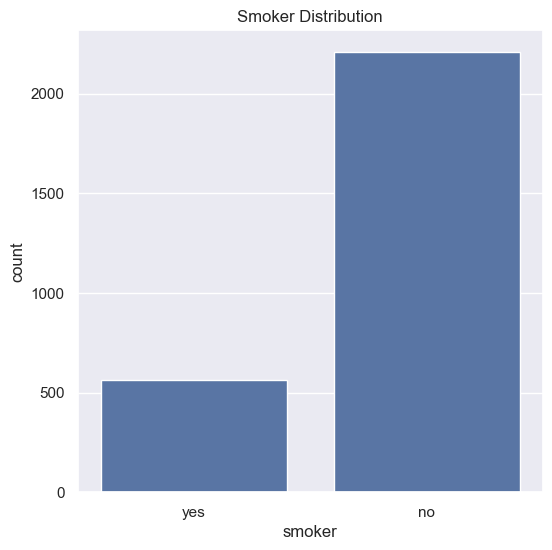

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x="smoker", data=insurance_dataset)
plt.title("Smoker Distribution")
plt.show()

In [16]:
insurance_dataset["smoker"].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

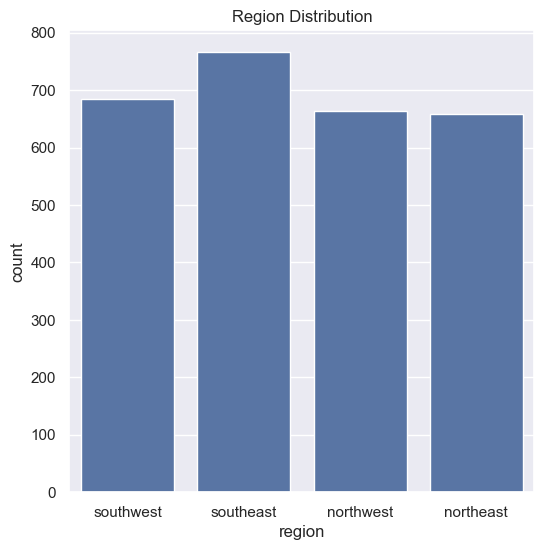

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x="region", data=insurance_dataset)
plt.title("Region Distribution")
plt.show()

In [18]:
insurance_dataset["region"].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

C:\Users\Dubai Computers\AppData\Local\Temp\ipykernel_6080\642262231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["charges"])


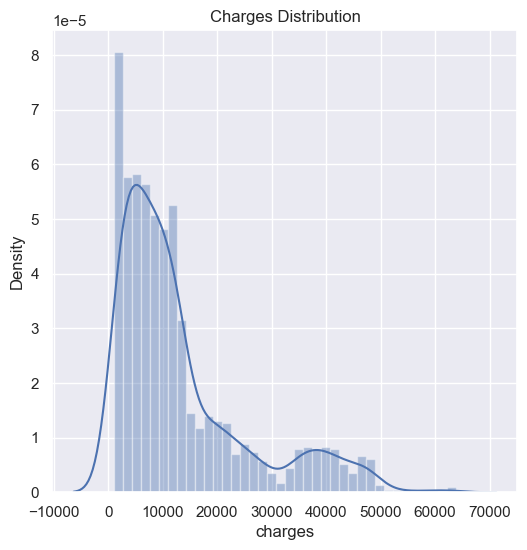

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["charges"])
plt.title("Charges Distribution")
plt.show()

# Data Preproccesing 

# Encoding 

In [20]:
# apply one hot encoding
encoded_categorical_data = pd.get_dummies(categorical_data,  dtype=int)
# Combining the numerical and encoded categorical data
final_dataset = pd.concat([numerical_data, encoded_categorical_data], axis=1)
# Display the final dataset
print(final_dataset.head())

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 

# Splitting the Feature and Label 

In [21]:
final_dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [22]:
x = final_dataset.drop(columns="charges", axis=1)
y = final_dataset["charges"]

# Splitting data into Train and Test 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(2772, 11) (2217, 11) (555, 11)


# Model Training 

# Linear Regresssion 

In [25]:
linear_reg_model = LinearRegression()

In [26]:
linear_reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# lasso 

In [27]:
la_model = Lasso()

In [28]:
la_model.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [29]:
la_model.score(x_test, y_test)

0.739808038285605

# Decision Tree Regressor 

In [30]:
dtr_model = DecisionTreeRegressor()

In [31]:
dtr_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [32]:
dtr_model.score(x_test, y_test)

0.9548026451321321

In [33]:
# prediction on Testing data
test_data_pred = dtr_model.predict(x_test)
# r2 value 
test_r2_value = r2_score(test_data_pred, y_test)
# display value 
print("R Squared Score : ", test_r2_value)

R Squared Score :  0.9529045693014204


# Building a Predictive System 

In [34]:
input_data = (19,27.900,0,1,0,0,1,0,0,0,1)
# chaging to numpy array 
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array 
input_data_reshape = input_data_as_numpy_array.reshape(1, -1) 
# prediction 
prediction = dtr_model.predict(input_data_reshape)
# display value  
print("Insurance Cost : ", prediction)

Insurance Cost :  [16884.924]


C:\Users\Dubai Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Model Evaluation 

In [35]:
# prediction on training data
train_data_pred = linear_reg_model.predict(x_train)
# r2 value 
train_r2_value = r2_score(train_data_pred, y_train)
# display value 
print("R Squared Score : ", train_r2_value)

R Squared Score :  0.6730626539818925


In [36]:
# prediction on Testing data
test_data_pred = linear_reg_model.predict(x_test)
# r2 value 
test_r2_value = r2_score(test_data_pred, y_test)
# display value 
print("R Squared Score : ", test_r2_value)

R Squared Score :  0.6288195435327955


# Save Model And Load Model 

In [37]:
# save model 
import joblib
filename = "DTR Medical insurance cost prediction.pkl"
joblib.dump(dtr_model, filename)

['DTR Medical insurance cost prediction.pkl']

In [38]:
# load the Model  
loaded_model = joblib.load(filename)
# Correct the shape: Wrap the list inside another list to create a 2D array
input_data = [[19, 27.900, 0, 1, 0, 0, 1, 0, 0, 0, 1]]
# Make the prediction
prediction = loaded_model.predict(input_data)

# Display the prediction
print("Medical Insurance cost Prediction:", prediction)

Medical Insurance cost Prediction: [16884.924]


C:\Users\Dubai Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
